In [1]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
from unidecode import unidecode
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [2]:
def display_wordcloud(list_wordclouds):
    plt.figure( figsize=(30,40) )
    j = 1
    for t, (title, wordcloud) in enumerate(list_wordclouds.items()):
        i=t+1
        plt.subplot(j, 4, i).set_title(title)
        plt.plot()
        plt.imshow(wordcloud, interpolation='bilinear',)
        plt.axis("off")
#     plt.fig.suptitle(title)
    plt.show()


def get_wordcloud(df, company, suffix=""):
    df_select = df[
        (df.company == company)]
    
    width = 600
    height = 700
    
    df_select_top_reviews = df_select[df_select["rating_star_cleaned_hide"] > 3]
    df_select_poor_reviews = df_select[df_select["rating_star_cleaned_hide"] < 4]

    wordcloud = WordCloud(width=width, height=height, background_color="white").generate(" ".join(df_select["reviews_cleaned"]))
    # Uncomment to save the file
    #     wordcloud.to_file(f"../OUTPUT/WORDCLOUDS/{company}_all_reviews{suffix}.png")
    
    wordcloud_top = WordCloud(width=width, height=height, background_color="white").generate(" ".join(df_select_top_reviews["reviews_cleaned"]))
    # Uncomment to save the file
    #     wordcloud_top.to_file(f"../OUTPUT/WORDCLOUDS/{company}_top_reviews{suffix}.png")
    
    wordcloud_poor = WordCloud(width=width, height=height, background_color="white").generate(" ".join(df_select_poor_reviews["reviews_cleaned"]))
    # Uncomment to save the file
    #     wordcloud_poor.to_file(f"../OUTPUT/WORDCLOUDS/{company}_poor_reviews{suffix}.png")

    display_wordcloud({
        "All": wordcloud, 
        "Top": wordcloud_top, 
        "Poor": wordcloud_poor})
    
#     plt.axis("off")
#     plt.show()

In [4]:
filename = "../DATA/ANALYSIS/all_reviews_all_companies_translated.xlsx"
df = pd.read_excel(filename, engine="openpyxl").fillna("")
df.head()

,Unnamed: 0,company,review_id,rating_star,date,title,review,customer_location,n_reviews_customer_hide,is_verified,verification_source_hide,review_source_hide,verification_level_hide,reply_content_hide,rating_star_cleaned_hide,n_reviews_customer_cleaned_hide,date_year_month_hide,text_cleaned_hide,page,text_cleaned_hide_EN
0,0,Lauritz.com,6062edd1f85d7508703d58f0,1 étoile : mauvais,2021-03-30T09:22:25+00:00,Håbløst og ulovligt !,Håbløst !\nSender dem en mail om fortrydelse og får intet svar. Må rykke i en uge. Køber et teak bord som viser sig at være palisander og nogle palisander skabe som stinker af røg!\nFordi jeg samt...,DK,26 avis,False,,,,,1,2,2021-03,håbløst og ulovligt ! håbløst !\nsender dem en mail om fortrydelse og får intet svar. må rykke i en uge. køber et teak bord som viser sig at være palisander og nogle palisander skabe som stinker a...,1,hopelessly and illegal! hopeless !\nSends them an email on regret and get no answer. May jerk for a week. Buyer a teak table that turns out to be rosewood and some rosewood cabinets like stinks of...
1,1,Lauritz.com,606218d2f85d7508703c5d8c,5 étoiles : excellent,2021-03-29T18:13:38+00:00,er fuldstændig styr på det hele,,DK,18 avis,False,,,,,5,1,2021-03,er fuldstændig styr på det hele,1,is complete track of it all
2,2,Lauritz.com,60616a7ff85d7508703acce2,3 étoiles : moyen,2021-03-29T05:49:51+00:00,Lauritz .com har et gevaldigt problem…,Lauritz .com har et gevaldigt problem med transportøren. Det er ALT for dyrt og ALT for langsomt!\nHvorfor skal jeg vente en uge på lev. fra Århus til jeres afdeling i Herlev og betale mere end 38...,DK,10 avis,False,,,,,3,1,2021-03,lauritz .com har et gevaldigt problem… lauritz .com har et gevaldigt problem med transportøren. det er alt for dyrt og alt for langsomt!\nhvorfor skal jeg vente en uge på lev. fra århus til jeres ...,1,Lauritz .com has a tremendous problem ... Lauritz .com has a tremendous problem with the carrier. It's too expensive and too slow!\nWhy should I wait a week in Lev. From Aarhus to your department ...
3,3,Lauritz.com,605cdf6af85d750870350ea5,1 étoile : mauvais,2021-03-25T19:07:22+00:00,Jeg har købt en vare via jeres auktion,"Jeg har købt en vare via jeres auktion, og min oplevelse med jeres kundeservice i den forbindelse lader mildt sagt en hel del tilbage at ønske – ja, jeg vil endda sige at servicen var under al kri...",DK,1 avis,False,,,,,1,1,2021-03,"jeg har købt en vare via jeres auktion jeg har købt en vare via jeres auktion, og min oplevelse med jeres kundeservice i den forbindelse lader mildt sagt en hel del tilbage at ønske – ja, jeg vil ...",1,"I bought an item through your auction I have bought an item through your auction, and my experience with your customer service in this connection lets mildly said a great deal to want - yes, I wou..."
4,4,Lauritz.com,605bb816f85d750870332126,5 étoiles : excellent,2021-03-24T22:07:18+00:00,Det positive først,"Det positive først. 2 gange indenfor relativ kort tid har jeg solgt 2 genstande på Lauritz.com, Aarhus. Begge gange med hammerslag over vurderingen, og \nvel at mærke begge gange med en værdi over...",DK,1 avis,False,,,,"Kære Per Jensen.\nTusind tak for den gode anmeldelse, og fordi du tager dig tid til at skrive den. Det betyder meget for os.\nDu har ret i, at fragtpriser kan være en barriere for at handle i vore...",5,1,2021-03,"det positive først det positive først. 2 gange indenfor relativ kort tid har jeg solgt 2 genstande på lauritz.com, aarhus. begge gange med hammerslag over vurderingen, og \nvel at mærke begge gang...",1,"It first positively the positive first. 2 times within relatively short time I have sold 2 objects on Lauritz.com, Aarhus. both times with hammer layer over the assessment, and\nTo mark both times..."


In [5]:
# function to remove stopwords
stop_words = [unidecode(w.lower()) for w in stop_words]
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev.lower().split() if i not in stop_words and len(i)>3])
    return rev_new

df["reviews_cleaned"] = df['text_cleaned_hide_EN'].copy()

# clean reviews
df["reviews_cleaned"] = df['reviews_cleaned'].apply(lambda x: " " + ' '.join([unidecode(w.lower()) for w in x.split()]))

words_toremove = ["lauritz", "lauritzcom", "dba", "tradera", "block", 
                  "auction", "good", "item"]

for word in words_toremove:
    df["reviews_cleaned"] = df["reviews_cleaned"].apply(lambda x: re.sub(f"{word}", " ", x))

# remove stopwords from the text
df["reviews_cleaned"] = df["reviews_cleaned"].apply(remove_stopwords)
# reviews = [remove_stopwords(r.split()) for r in df['review_all']]

df["reviews_cleaned"] = df["reviews_cleaned"].apply(lambda x: re.sub(r"[^a-z\s]", "", x))

# # make entire text lowercase
# reviews = " ".join([r.lower() for r in reviews])

df["reviews_cleaned"] = df["reviews_cleaned"].apply(lambda x: re.sub("\s+", " ", x))

Lauritz.com


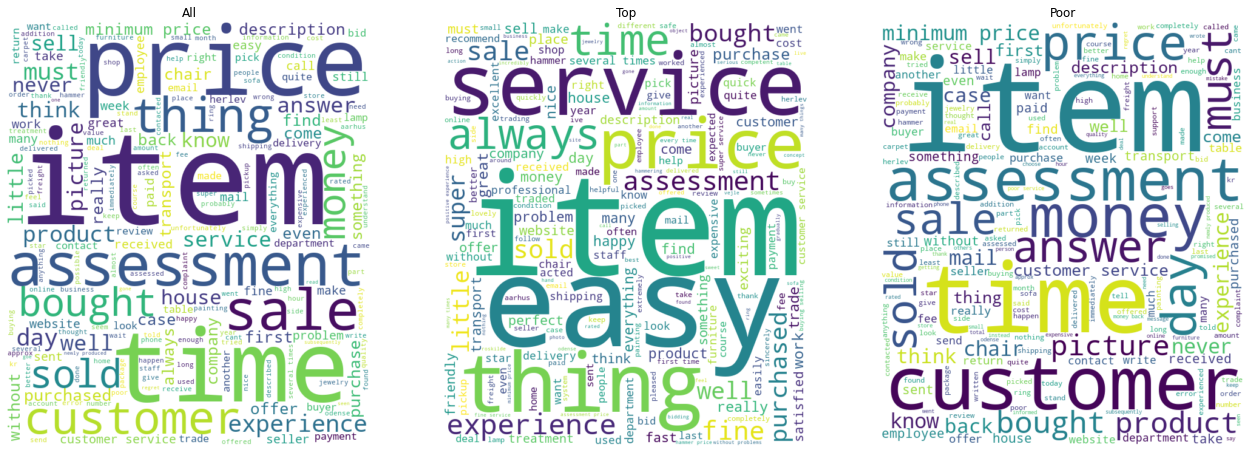

Tradera


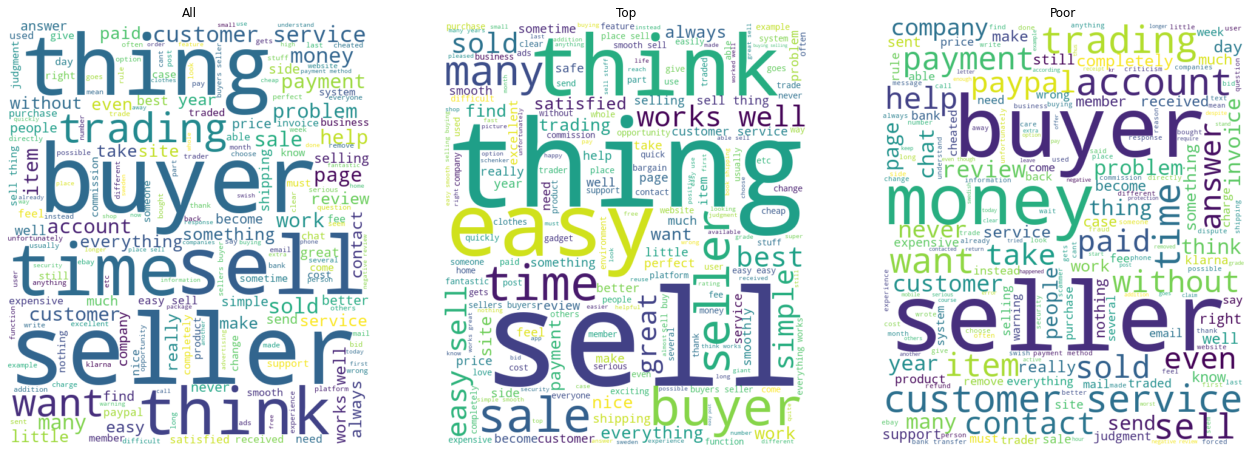

DBA


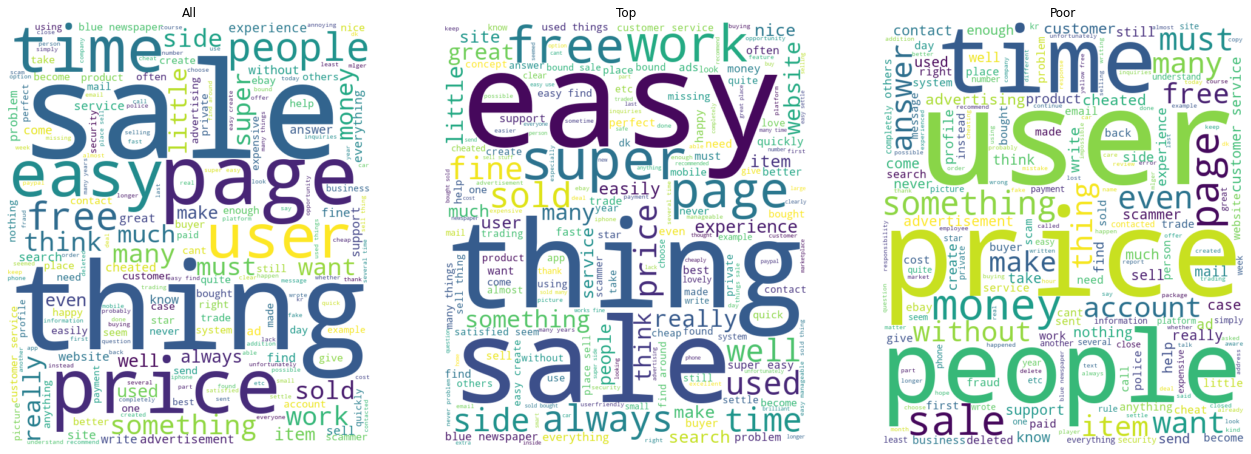

GulogGratis.dk


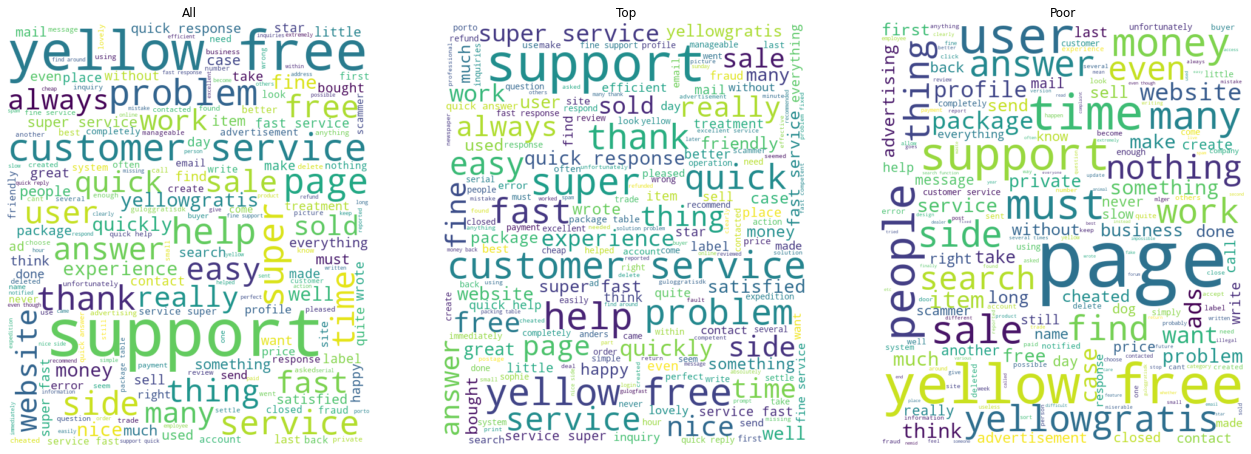

Blocket


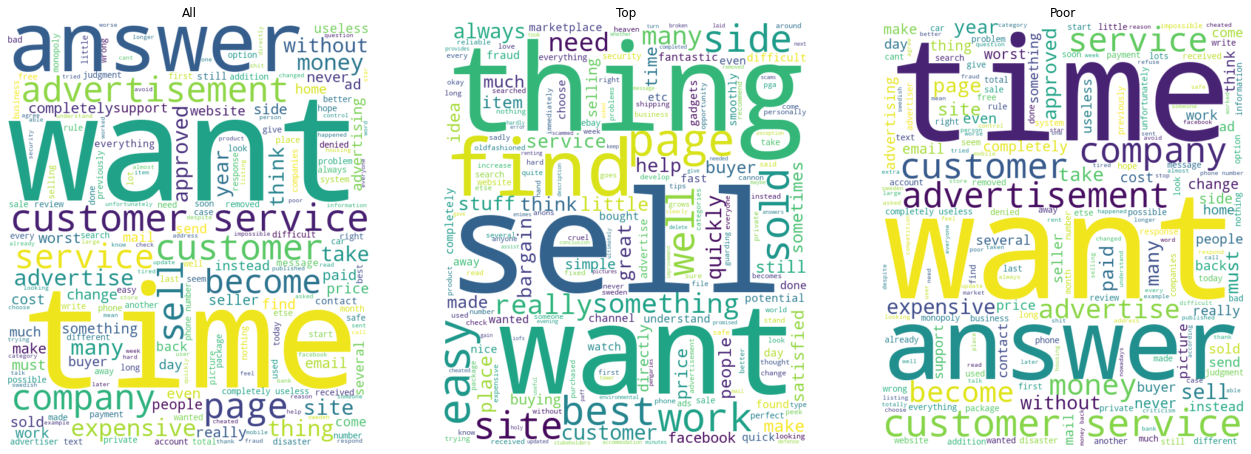

In [6]:
for company in df.company.unique():
    print(company)
    get_wordcloud(df, company, "englishAll")
#     get_wordcloud(df_work, company, "more10words")